In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

**Sigmoid Function**

In [3]:
def sigmoid (X):
    return 1/(1+np.exp(-X))

**Standardization**

In [4]:
def standardization(X):
  scaler = preprocessing.StandardScaler()
  X = scaler.fit_transform(X)
  
  return X

**note:** make_classification function creates clusters of points normally distributed (std=1)  , which doesn't need Standardization ,but  Some algorithms are vulnerable to features with different scales. Especially if we are using gradient descent for optimization, then the model will have a hard time giving accurate results; for example, if a dataset has two features, age and salary, then the salary feature with its higher range will most likely dominate the outcome. So, it is a good practice to standardize data before feeding it to the algorithm.

#Logistic Regression (From Scratch)

In [5]:
class Logistic_Regression:
  def __init__ (self):
    self.weights= np.random.random(1)
    self.bias=0
    return


  def fit(self, X,Y,Lr=0.001,epochs=100):
    
      def cost(Y,y_pred):
         return (-1/len(Y)) * (np.dot(Y.T, np.log(y_pred)) + np.dot((1 - Y.T), np.log(1 - y_pred)) )
     
      self.weights= np.random.random((np.array(X).shape[1],1))
      cost_list = []
      for i in range(epochs):
          y = np.dot(X,self.weights)+self.bias
          y_pred= sigmoid(y)
          cost_list.append(cost(Y,y_pred))
          GD_weights = np.dot(X.T,(y_pred-Y))
          GD_bias = 1/X.shape[0]*np.sum(y_pred-Y)
          self.weights-=Lr*GD_weights
          self.bias-=Lr*GD_bias
          
          
      return np.array(cost_list[1:])

  def predict (self, X):
    y = np.dot(X,self.weights)+self.bias
    y_pred= sigmoid(y)
    for i in range(len(y_pred)) :
        if (y_pred[i]>0.5):
            y_pred[i]=1
        else:
            y_pred[i]=0
    return y_pred

#Heart Disease Dataset 

In [141]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset')

Skipping, found downloaded files in "./heart-disease-dataset" (use force=True to force download)


In [142]:
df = pd.read_csv('/content/heart-disease-dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [143]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Outliers**

In [145]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df)

In [146]:
outliers.isnull().sum()

age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64

In [147]:
#Remove outliers
df = outliers.dropna().reset_index()

In [148]:
df = df.drop(columns=['index'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
2,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
3,58,0,0,100.0,248.0,0.0,0,122.0,0,1.0,1,0.0,2.0,1
4,55,1,0,160.0,289.0,0.0,0,145.0,1,0.8,1,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,1
765,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0,0
766,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0,0
767,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0,1


In [149]:
X = df.iloc[: , :-1]
X = standardization(X)
Y = df.iloc[: , -1]


In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)

In [151]:
model = Logistic_Regression()

###Train 1

In [152]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.0005)

In [153]:
pred = model.predict(X_test)

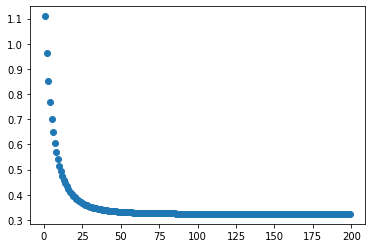

In [154]:
plt.scatter( range(1,200), history)

In [155]:
confusion_matrix(y_test, pred)

array([[38,  7],
       [ 2, 30]])

In [156]:
accuracy_score(y_test, pred)

0.8831168831168831

In [157]:
precision_score(y_test, pred)

0.8108108108108109

In [158]:
recall_score(y_test, pred)

0.9375

In [159]:
f1_score(y_test, pred)

0.8695652173913043

###Train 2

In [160]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.001)

In [161]:
pred = model.predict(X_test)

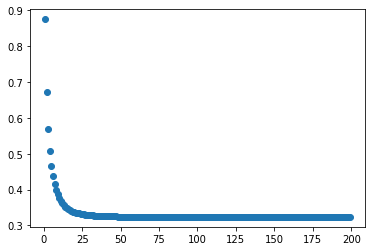

In [162]:
plt.scatter( range(1,200), history)

In [163]:
confusion_matrix(y_test, pred)

array([[38,  7],
       [ 2, 30]])

In [164]:
accuracy_score(y_test, pred)

0.8831168831168831

In [165]:
precision_score(y_test, pred)

0.8108108108108109

In [166]:
recall_score(y_test, pred)

0.9375

In [167]:
f1_score(y_test, pred)

0.8695652173913043

###Train 3

In [168]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.01)

In [169]:
pred = model.predict(X_test)

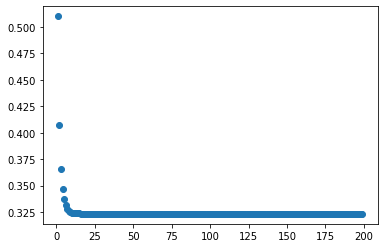

In [170]:
plt.scatter( range(1,200), history)

In [171]:
confusion_matrix(y_test, pred)

array([[38,  7],
       [ 2, 30]])

In [172]:
accuracy_score(y_test, pred)

0.8831168831168831

In [173]:
precision_score(y_test, pred)

0.8108108108108109

In [174]:
recall_score(y_test, pred)

0.9375

In [175]:
f1_score(y_test, pred)

0.8695652173913043

###Train 4

In [203]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [204]:
pred = model.predict(X_test)

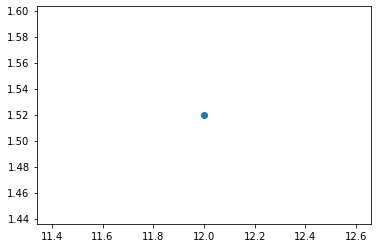

In [205]:
plt.scatter( range(1,200), history)

In [206]:
confusion_matrix(y_test, pred)

array([[36,  9],
       [ 3, 29]])

In [207]:
accuracy_score(y_test, pred)

0.8441558441558441

In [208]:
precision_score(y_test, pred)

0.7631578947368421

In [209]:
recall_score(y_test, pred)

0.90625

In [210]:
f1_score(y_test, pred)

0.8285714285714286

###Train 5

In [221]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [222]:
pred = model.predict(X_test)

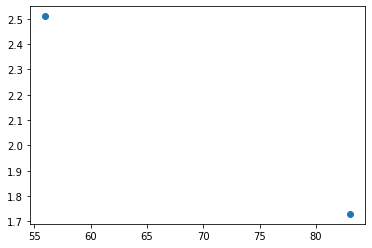

In [223]:
plt.scatter( range(1,200), history)

In [224]:
confusion_matrix(y_test, pred)

array([[36,  9],
       [ 2, 30]])

In [225]:
accuracy_score(y_test, pred)

0.8571428571428571

In [226]:
precision_score(y_test, pred)

0.7692307692307693

In [227]:
recall_score(y_test, pred)

0.9375

In [228]:
f1_score(y_test, pred)

0.8450704225352113

#Bank Note Authentication UCI Dataset

In [229]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/vivekgediya/banknote-authenticationcsv')

Skipping, found downloaded files in "./banknote-authenticationcsv" (use force=True to force download)


In [230]:
df = pd.read_csv('/content/banknote-authenticationcsv/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [231]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [232]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**Outliers**

In [233]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df)

In [234]:
outliers.isnull().sum()

variance     0
skewness     0
curtosis    59
entropy     33
class        0
dtype: int64

In [235]:
#Remove outliers
df = outliers.dropna().reset_index()

In [236]:
df = df.drop(columns=['index'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1275,-1.16670,-1.42370,2.92410,0.66119,1
1276,-2.41000,3.74330,-0.40215,-1.29530,1
1277,0.40614,1.34920,-1.45010,-0.55949,1
1278,-1.38870,-4.87730,6.47740,0.34179,1


In [237]:
X = df.iloc[: , 0:-1]
X = standardization(X)
Y = df.iloc[: , -1]


In [238]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)

In [239]:
X_train.shape

(1152, 4)

In [240]:
model = Logistic_Regression()

###Train 1

In [241]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.0005)

In [242]:
pred = model.predict(X_test)

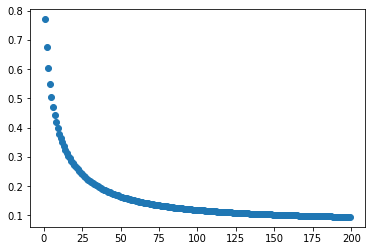

In [243]:
plt.scatter( range(1,200), history)

In [244]:
confusion_matrix(y_test, pred)

array([[74,  4],
       [ 0, 50]])

In [245]:
accuracy_score(y_test, pred)

0.96875

In [246]:
precision_score(y_test, pred)

0.9259259259259259

In [247]:
recall_score(y_test, pred)

1.0

In [248]:
f1_score(y_test, pred)

0.9615384615384615

###Train 2

In [249]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.001)

In [250]:
pred = model.predict(X_test)

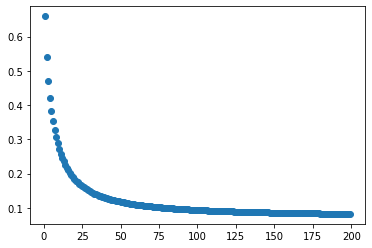

In [251]:
plt.scatter( range(1,200), history)

In [252]:
confusion_matrix(y_test, pred)

array([[74,  4],
       [ 0, 50]])

In [253]:
accuracy_score(y_test, pred)

0.96875

In [254]:
precision_score(y_test, pred)

0.9259259259259259

In [255]:
recall_score(y_test, pred)

1.0

In [256]:
f1_score(y_test, pred)

0.9615384615384615

###Train 3

In [257]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.01)

In [258]:
pred = model.predict(X_test)

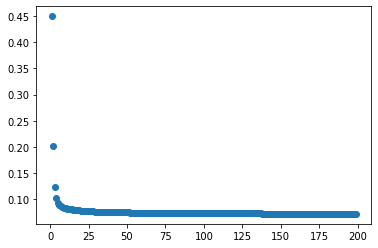

In [259]:
plt.scatter( range(1,200), history)

In [260]:
confusion_matrix(y_test, pred)

array([[75,  3],
       [ 0, 50]])

In [261]:
accuracy_score(y_test, pred)

0.9765625

In [262]:
precision_score(y_test, pred)

0.9433962264150944

In [263]:
recall_score(y_test, pred)

1.0

In [264]:
f1_score(y_test, pred)

0.970873786407767

###Train 4

In [265]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [266]:
pred = model.predict(X_test)

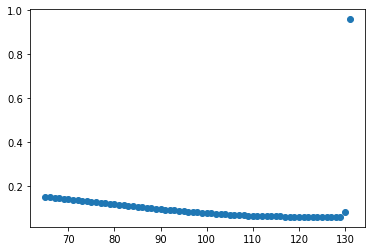

In [267]:
plt.scatter( range(1,200), history)

In [268]:
confusion_matrix(y_test, pred)

array([[75,  3],
       [ 2, 48]])

In [269]:
accuracy_score(y_test, pred)

0.9609375

In [270]:
precision_score(y_test, pred)

0.9411764705882353

In [271]:
recall_score(y_test, pred)

0.96

In [272]:
f1_score(y_test, pred)

0.9504950495049505

###Train 5

In [273]:
history = model.fit(X_train,y_train, epochs=200, Lr=0.15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [274]:
pred = model.predict(X_test)

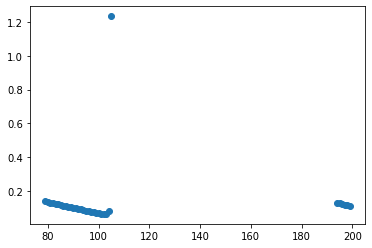

In [275]:
plt.scatter( range(1,200), history)

In [276]:
confusion_matrix(y_test, pred)

array([[75,  3],
       [ 2, 48]])

In [277]:
accuracy_score(y_test, pred)

0.9609375

In [278]:
precision_score(y_test, pred)

0.9411764705882353

In [279]:
recall_score(y_test, pred)

0.96

In [280]:
f1_score(y_test, pred)

0.9504950495049505